In [117]:
!pip install yfinance
!pip install scikit-learn
!pip install matplotlib
!pip install pandas
!pip install ta-lib
!pip install flask

In [118]:
import sys
import yfinance as yf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from datetime import date
from datetime import datetime
import talib as ta

In [119]:
# Check if arguments are provided (excluding the script name itself)
if len(sys.argv) == 1:
    # Get the first argument (index 1) since the script name is at index 0
    symbol = sys.argv[1]

    # Display the argument
    print("Argument 1: {symbol}")
else:
    print("No arguments provided.")

No arguments provided.


In [120]:
# for jupyter notebook only
symbol = "MGROS.IS"

In [121]:
#only takes data starting from last years first day until today
#if it is a new stock, it will take data from the first day it is listed

today = date.today()
stock_data = yf.download(symbol, start=("2022-01-01"), end=today)

#we check if the stock is new or not
if len(stock_data) < 300:
    data_old = False
else:
    data_old = True

df = pd.DataFrame(stock_data)
df['DailyReturn'] = df['Close'].pct_change()
df['Target'] = df['DailyReturn'].apply(lambda x: 1 if x > 0 else 0)
df = df.dropna()
print(df)

[*********************100%***********************]  1 of 1 completed
                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2022-01-04   39.500000   43.000000   39.180000   43.000000   42.356861   
2022-01-05   43.500000   44.299999   42.660000   42.740002   42.100750   
2022-01-06   42.619999   43.240002   41.860001   42.900002   42.258358   
2022-01-07   43.200001   43.639999   42.700001   43.520000   42.869083   
2022-01-10   43.759998   43.799999   43.000000   43.000000   42.356861   
...                ...         ...         ...         ...         ...   
2023-08-16  345.500000  353.700012  337.899994  346.600006  346.600006   
2023-08-17  346.600006  350.799988  342.000000  350.100006  350.100006   
2023-08-18  353.000000  355.100006  330.000000  335.000000  335.000000   
2023-08-21  334.500000  351.799988  327.000000  350.899994  350.899994   
2023-08-22  351.100006  353.799988  339.200

In [122]:
#if data is old, use SMA_20, SMA_50, SMA_100
if data_old:
    df["SMA_20"] = df["Close"].rolling(20).mean()
    df["SMA_50"] = df["Close"].rolling(50).mean()
    df["SMA_100"] = df["Close"].rolling(100).mean()
# if data is new, use SMA_5, SMA_20
else:
    df["SMA_5"] = df["Close"].rolling(5).mean()
    df["SMA_20"] = df["Close"].rolling(20).mean()

In [123]:
#if data is old, use EMA_20, EMA_50, EMA_100
if data_old:
    df["EMA_20"] = ta.EMA(df["Close"], timeperiod=20)
    df["EMA_50"] = ta.EMA(df["Close"], timeperiod=50)
    df["EMA_100"] = ta.EMA(df["Close"], timeperiod=100)
# if data is new, use EMA_5, EMA_20
else:
    df["EMA_5"] =  ta.EMA(df["Close"], timeperiod=5)
    df["EMA_20"] = ta.EMA(df["Close"], timeperiod=20)

In [124]:
df["RSI"] = ta.RSI(df["Close"])

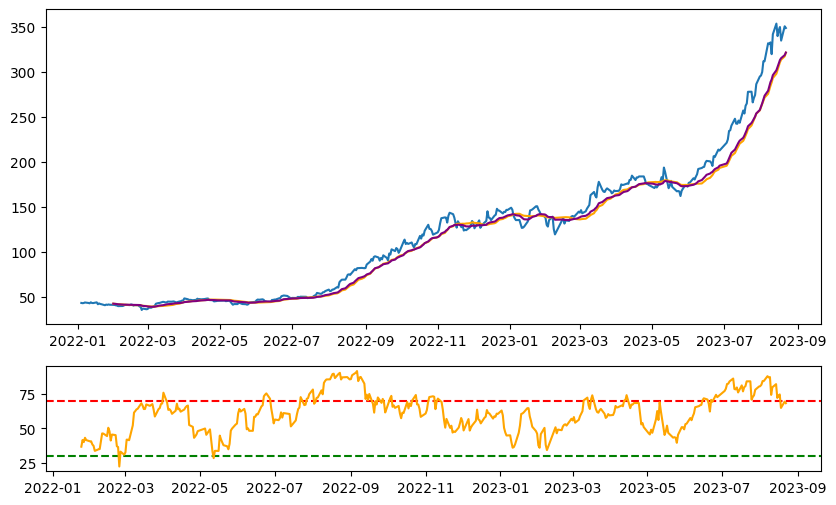

In [125]:
fig, axs = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]}, figsize=(10, 6))
if data_old:
    axs[0].plot(df['Close'])
    axs[0].plot(df['SMA_20'], color='orange')
    axs[0].plot(df['EMA_20'], color='purple')
else: 
    axs[0].plot(df['Close'])
    axs[0].plot(df['SMA_5'], color='orange')
    axs[0].plot(df['EMA_5'], color='purple')

axs[1].axhline(y=70, color='r', linestyle='--')
axs[1].axhline(y=30, color='g', linestyle='--')
axs[1].plot(df['RSI'], color='orange')

In [126]:
save_name = "./"+symbol+".png"
fig.savefig(save_name, dpi=300, bbox_inches='tight')

In [127]:
#df["LINEARREG"] = ta.LINEARREG(df["Close"], timeperiod= 100)
#doesn't work as intented
#plt.plot(df["Close"])
#plt.plot(df["LINEARREG"])